In [23]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from time import time
from tqdm import tqdm_notebook
# from tqdm import trange

from keras.models import Model, load_model
from keras.layers import Input, Dense, Flatten,  Conv2D
# MaxPooling2D, Dropout, UpSampling2D, concatenate, Cropping2D, Reshape, BatchNormalization
from keras.optimizers import SGD, Adam

import os

import pandas as pd
from keras.utils import HDF5Matrix
from keras.utils.data_utils import get_file
from keras import backend as K

%matplotlib inline

In [8]:
import numpy as np
import h5py
import gzip

In [7]:
data_dir = './data/'

class DataSet:
    def __init__(self, imgs, lbls=None):
        self.imgs = imgs
        self.lbls = lbls
    
    def get_lenght(self):
        return len(self.imgs)
    
    def show_image(self, i):
        if self.lbls != None:
            f, axes = plt.subplots(1, 2)
            for ax, im, t in zip(axes, 
                                 (self.imgs[i], self.lbls[i]), 
                                 ('RGB image', 
                                  'Manual annotation; Range: [{}, {}]'.format(self.lbls[i].min(), 
                                                                              self.lbls[i].max()))):
                ax.imshow(im)
                ax.set_title(t)
        else:
            plt.imshow(self.imgs[i])
            plt.title('RGB image')
        plt.show()

camelyonpatch_level_2_split_test_meta.csv
camelyonpatch_level_2_split_train_meta.csv 
camelyonpatch_level_2_split_valid_meta.csv
camelyonpatch_level_2_split_test_y.h5.gz
camelyonpatch_level_2_split_valid_y.h5.gz
camelyonpatch_level_2_split_test_x.h5.gz
camelyonpatch_level_2_split_train_mask.h5.gz
camelyonpatch_level_2_split_train_y.h5.gz
camelyonpatch_level_2_split_valid_x.h5.gz

In [40]:
import gzip
pc_train_x_h5 = gzip.open(data_dir + 'camelyonpatch_level_2_split_train_x.h5.gz', 'rb')
pc_train_y_h5 = gzip.open(data_dir + 'camelyonpatch_level_2_split_train_y.h5.gz', 'rb')
pc_valid_y_h5 = gzip.open(data_dir + 'camelyonpatch_level_2_split_valid_y.h5.gz', 'rb')
pc_valid_x_h5 = gzip.open(data_dir + 'camelyonpatch_level_2_split_valid_x.h5.gz', 'rb')
pc_test_x_h5 = gzip.open(data_dir + 'camelyonpatch_level_2_split_test_x.h5.gz', 'rb')
pc_test_y_h5 = gzip.open(data_dir + 'camelyonpatch_level_2_split_test_y.h5.gz', 'rb')


In [41]:
meta_train = pd.read_csv('./data/camelyonpatch_level_2_split_train_meta.csv')
meta_valid = pd.read_csv('./data/camelyonpatch_level_2_split_valid_meta.csv')
meta_test = pd.read_csv('./data/camelyonpatch_level_2_split_test_meta.csv')
       

In [43]:
x_train = HDF5Matrix(pc_train_x_h5, 'x')
y_train = HDF5Matrix(pc_train_y_h5, 'y')
x_valid = HDF5Matrix(pc_valid_x_h5, 'x')
y_valid = HDF5Matrix(pc_valid_y_h5, 'y')
x_test = HDF5Matrix(pc_test_x_h5, 'x')
y_test = HDF5Matrix(pc_test_y_h5, 'y')


In [39]:
labels_train, counts_train = np.unique(np.ravel(y_train), return_counts=True)
labels_valid, counts_valid = np.unique(np.ravel(y_valid), return_counts=True)

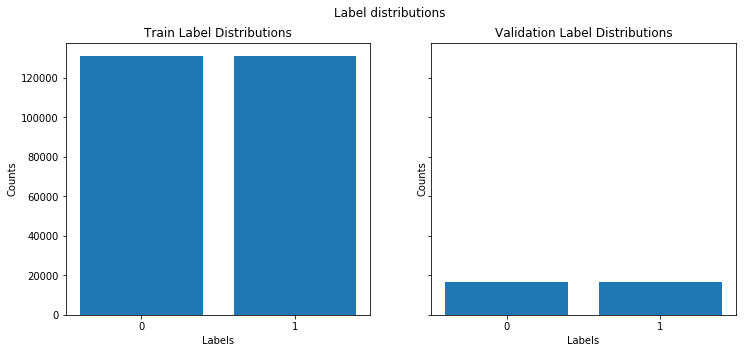

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
labels = list(labels_train)
axs[0].bar(labels, counts_train)
axs[0].set_xticks(labels)
axs[0].set_xlabel('Labels')
axs[0].set_ylabel('Counts')
axs[0].set_title('Train Label Distributions')
axs[1].bar(labels, counts_valid)
axs[1].set_xticks(labels)
axs[1].set_xlabel('Labels')
axs[1].set_ylabel('Counts')
axs[1].set_title('Validation Label Distributions')

fig.suptitle('Label distributions')

plt.show()

In [93]:
def show_img(img_id):
    plt.figure(figsize=(8, 5))
    pixels = x_train[img_id]
    plt.imshow(pixels)
    lbl = np.ravel(y_train[img_id])
    plt.title('Label: {}'.format(lbl))

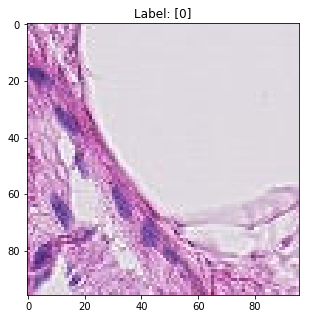

In [100]:
random_id = np.random.randint(len(x_train))
show_img(random_id)